You will need a few unusual libraries




In [0]:
# Author : P. Mondal
# Date : April 22, 2020

In [1]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

In [2]:
#system options you will need
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
np.set_printoptions(threshold=sys.maxsize)
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from google.colab import drive

drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd /content/gdrive/My\ Drive/MLTSA2020/


/content/gdrive/My Drive/MLTSA2020


In [6]:
cd data

/content/gdrive/My Drive/MLTSA2020/data


# I am going to download data from someone's github repo
One of you asked me earlier in the semester how one would so this. We will use data from Salika Dave, a student at Mumbai tech who stored some soundbites on her GitHub repo.

In [0]:
from github import Github
# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()



In [0]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")


In [9]:
wavfiles = repo.get_contents("voices")
#.repos_url#("Speech_Recognition")
wavfiles

[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [0]:
path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(path,f.path)
    os.system(cmd)

In [11]:
%ls -l

total 92777
-rw------- 1 root root      151 Mar  9 03:18 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_821337.gsheet
-rw------- 1 root root   177911 Mar  9 03:19 API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv
-rw------- 1 root root      151 Mar  9 03:35 API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.gsheet
-rw------- 1 root root   128044 Apr 22 20:56 Jarvisd_template.wav
-rw------- 1 root root   128044 Apr 22 22:32 Jarvisd_template.wav.1
-rw------- 1 root root   128044 Apr 23 01:48 Jarvisd_template.wav.2
-rw------- 1 root root   128044 Apr 23 04:47 Jarvisd_template.wav.3
-rw------- 1 root root   128044 Apr 22 20:56 Jarvise_template.wav
-rw------- 1 root root   128044 Apr 22 22:32 Jarvise_template.wav.1
-rw------- 1 root root   128044 Apr 23 01:48 Jarvise_template.wav.2
-rw------- 1 root root   128044 Apr 23 04:47 Jarvise_template.wav.3
-rw------- 1 root root   128044 Apr 22 20:56 Jarvish_template.wav
-rw------- 1 root root   128044 Apr 22 22:32 Jarvish_template.wav.1
-rw------- 1 root root   128044 Apr 23 01

In [12]:
cd ../

/content/gdrive/My Drive/MLTSA2020


In [13]:
filenames = np.sort(glob.glob("data/*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (pl.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (pl.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (pl.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (pl.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (pl.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [0]:
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [122]:
for k,v in colors.items():
        print(k,v)

Jarvis ((0.267004, 0.004874, 0.329415, 1.0), 'Jarvis')
Tofftl ((0.229739, 0.322361, 0.545706, 1.0), 'Turn off the lights')
Tontl ((0.127568, 0.566949, 0.550556, 1.0), 'Turn on the lights')
Tontt ((0.369214, 0.788888, 0.382914, 1.0), 'Turn on the TV')
Ttat ((0.993248, 0.906157, 0.143936, 1.0), 'Turn the air temperature')


#Data Exploration and Visualization 
## plot the sound bites
the sound bites are read in as numpy array by the ```scipy.io.wavfile``` module. The dataset is comprised of 5 soundbites for each of 5 sentences. The word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature". Each sound bite, for each sentence, is read by a different person, with different accents, genders, and background noise. if you install the pydub  module and run the notebook locally you can hear each soundbite in this loop (wont play on google colab).

Text(0.5, 1.0, 'Soundbite plot')

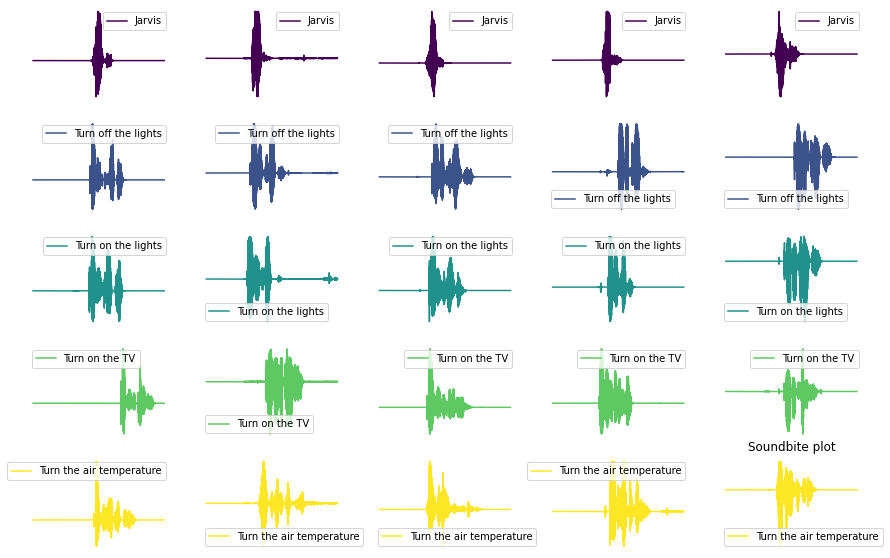

In [14]:
fig = pl.figure(figsize(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play
for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f: 
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    ax.axis('off')              
    pl.legend()
pl.title('Soundbite plot')

Figure 1: 25 sound bites read in as arrays from the original *.wav* file. The arrays represnet sound intensity *vs* time, but the spectral sound information (frequency) is lost.  These are therefore simplified representations of the original data. 
Each of 5 sentences is recorded as spoken by a different person in a different environment: the word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature".  In the above plot, each row is a different sentence (also plotted with a different color). The content of the soundbite is written on top of the wave plot.  At a glance, the soundbites show some similarities within the same sentence, mostly in the duration of the speech. We also note that the starting point of the speech is not homogeneous within the recorded segment.

The following analysis could be implemented in the full spectral-features dataset, but the current 1-dimensional representation of the data alows for a simpler implementation of the methods.

In [15]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## downsampling the large arrays 
each sound bit is stored in an array of 64000 elements. To work effectively we will downsample them by a factor of 10. Occasionally I will downsample it further.

Since classifying these sound mites will require generating distance arrays, we want to know ahead of time what we are getting ourelves into. We are working with foating point numbers
- 64 bits per number
We want to build 2D arrays that are NxN sized where N is the length of the soundbite array (64,000)
- 64000x64000
- 1 GB is 8e9 bit
## *task 1: Print out the amount of memory in Gigabytes (or Megabytes where needed) that would take to create a single distance matrix, a distance matrix subsampling the array by 10, by 8, and by 100*

In [15]:
wavfiles[0].shape[0]

64000

In [16]:
# It's already done here ????
print("calculating a distance matrix for the full files would requires " + 
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 8 requires " + 
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " + 
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 8 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [0]:
# Subsampled by factor of step
steps = 10

In [0]:
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [19]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

inspect the sound bites: the original array and the downsampled, normalized ones. 

Text(0.5, 1.0, 'Wavefiles 5 to 20 in steps of 5')

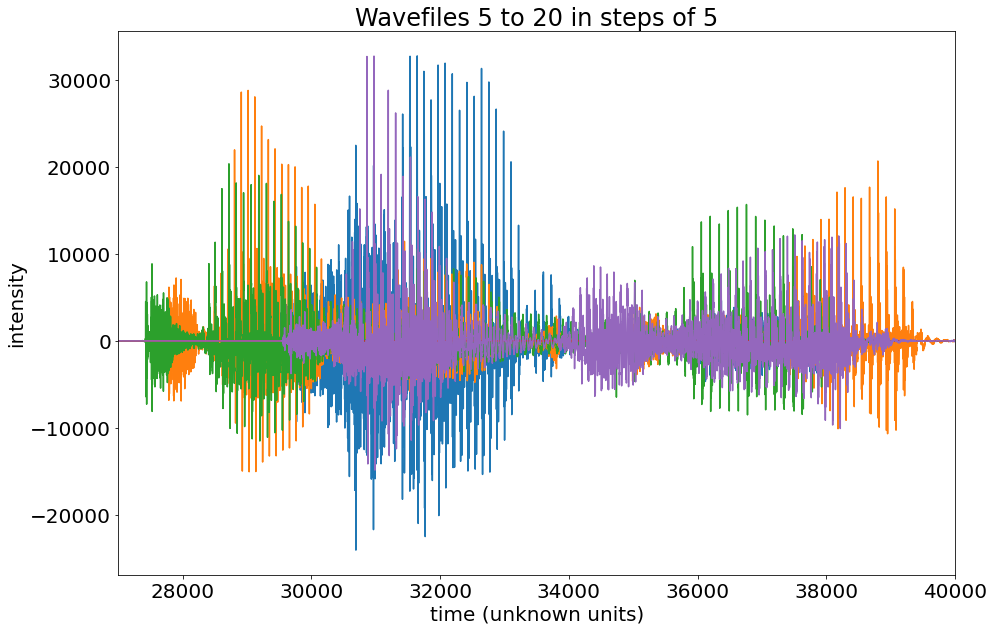

In [20]:
pl.rcParams['font.size'] = 20
pl.plot(wavfiles[0])
pl.plot(wavfiles[5])
pl.plot(wavfiles[10])
pl.plot(wavfiles[15])
pl.plot(wavfiles[20])
pl.xlim(27000, 40000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);
pl.title('Wavefiles 5 to 20 in steps of 5')

Figure 2: the first sound bite for each sentene, the core portion of the array only is shown, elements 27000-40000 of 64000.


Text(0.5, 1.0, 'Wavefiles 5 to 20 in steps of 5: Normalized')

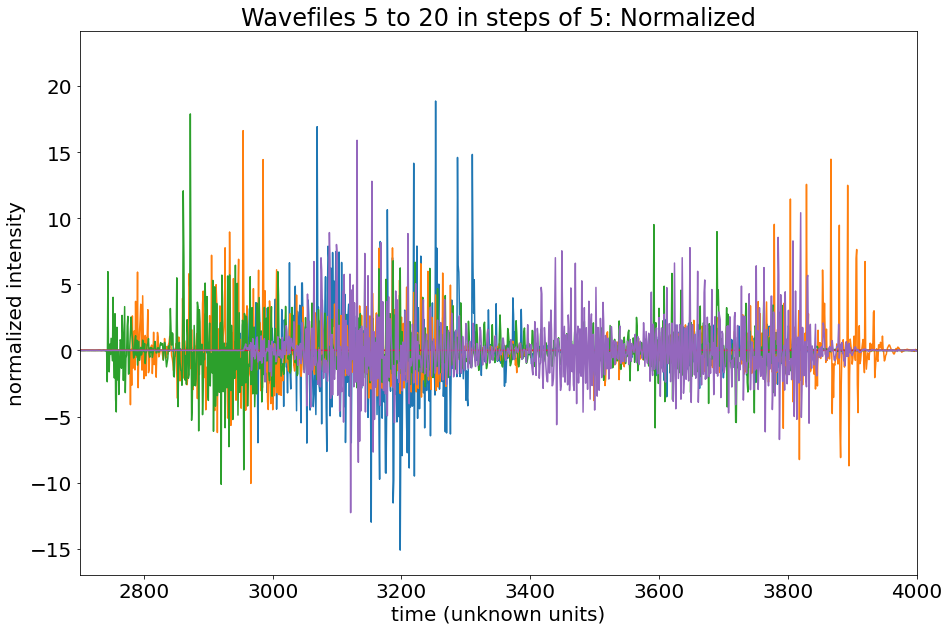

In [22]:
pl.rcParams['font.size'] = 20
pl.plot(X[0])
pl.plot(X[5])
pl.plot(X[10])
pl.plot(X[15])
pl.plot(X[20])
pl.xlim(2700, 4000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("normalized intensity", fontsize=20);
pl.title('Wavefiles 5 to 20 in steps of 5: Normalized')

Figure 3: Same as figure 2 but for the standardized arrays, downsampled by a factor 10 by selecting every 10th datum.

# Calculating distance between sound bites
# Naive distsances between two arrays
Plot the distance between each pair of the 25 sound bites. The distance matrix should be 25x25 and each entry should be a naive distance calculated between the 2 arrays. 

The naive distance can be the sum of the difference between entries of the array at the same time stamp, i.e. along the diagonal, or its absolute value, which would correspond to the L1 metric

In [0]:
def naive_distances(a, b):
    return (a - b).sum()
def l1(a, b):
    return (np.abs(a - b)).sum()

to save time I am resampling again by the same step. This is equivalent to resampling by 100

## *task 1: explain the figures*

In [0]:
# cdist(X[:,::steps], 
#               X[:,::steps], metric=naive_distances)

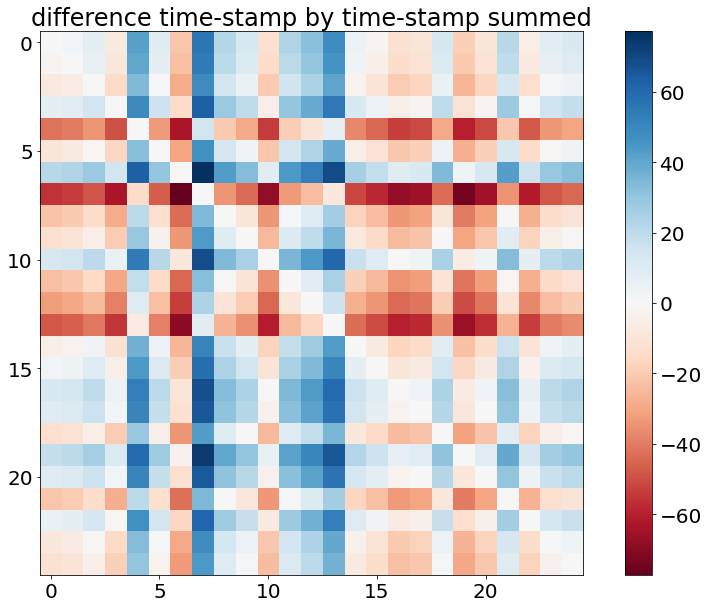

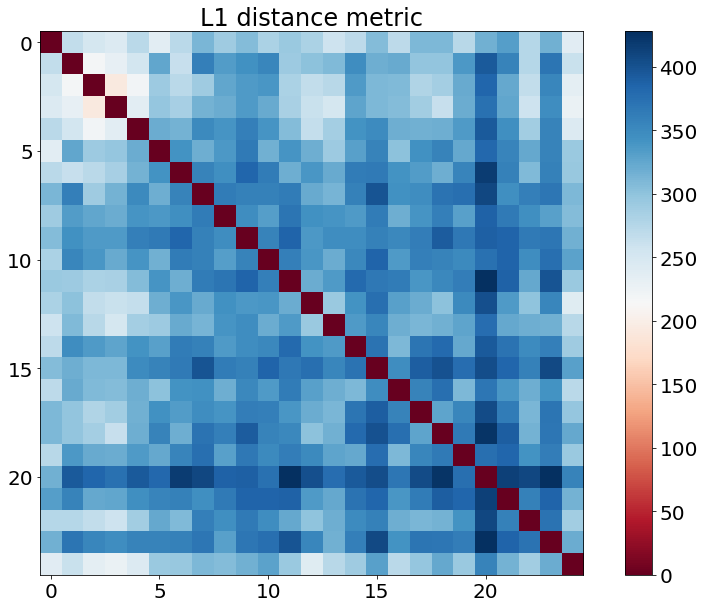

In [25]:
pl.imshow(cdist(X[:,::steps], 
               X[:,::steps], metric=naive_distances), 
         cmap="RdBu")
pl.title("difference time-stamp by time-stamp summed")
pl.colorbar()

pl.figure()
pl.imshow(cdist(X[:,::steps], 
               X[:,::steps], metric=l1), 
         cmap="RdBu")
pl.title("L1 distance metric");
pl.colorbar()


Fig 3: Both figures above show matrix elements of distance matrix calculated for same data series using two different methods namely "naive_distances" and "l1". The diagonal elements show the data series in same timestep and hence for same data series should be zero in both cases an indeed we see that they are zero.

# Pairwise time-stamps distance: each time series is a vector, so we can look at the timestamp-to-timestamp distance matrix

This is the object whose diagonal you summed over to get the naive distances and the L1 distances above.
For the full sample array this should be a 64000x64000 array. It is ok to calculate the distance and plot the stanradrized arrays, further downsampled by 10 (640x640 array)

use ```scipy.spatial.distance.cdist()``` and the L1 metric that was created earlier

## *task 2 comment on the following 2 figures*

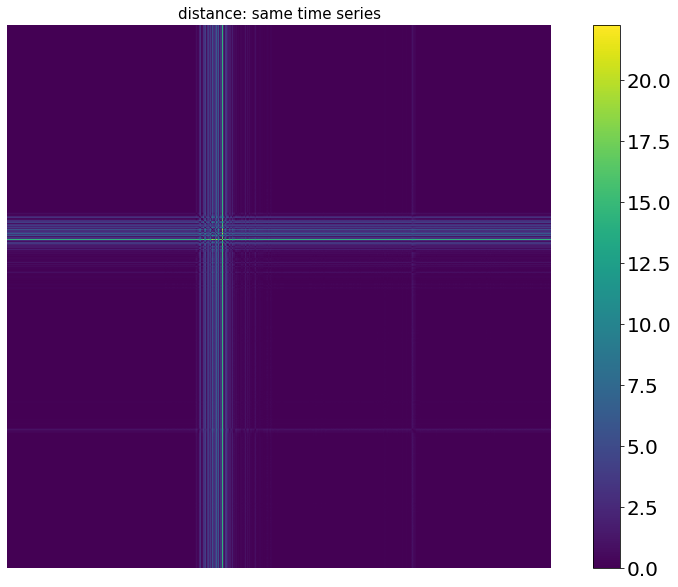

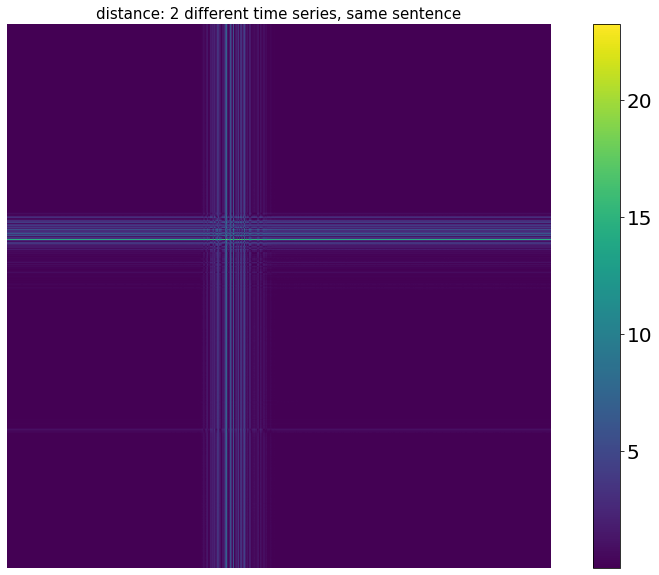

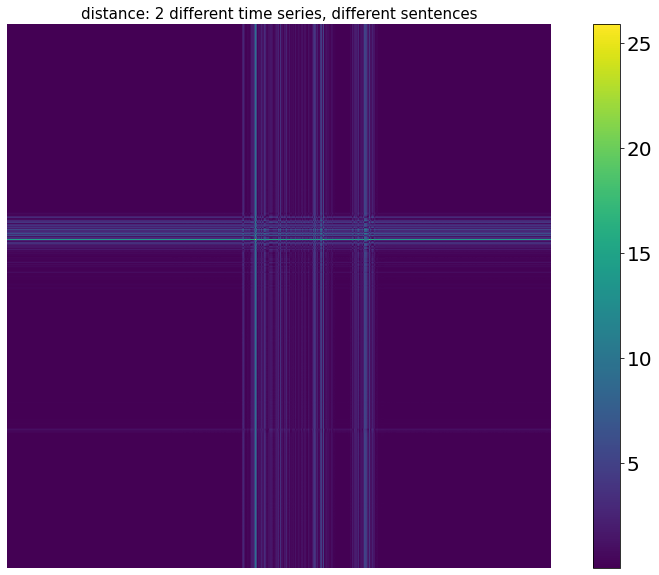

In [27]:
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[1][::steps]).T,
      metric=l1))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.colorbar()
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[2][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.colorbar()
pl.axis('off')
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[10][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, different sentences", 
         fontsize=15);
pl.axis('off');
pl.colorbar()


Fig 4 : The figures above show distance metrics computed using l1 method.
The top figure is for same dataset i.e. same sentence and same time series and hence show a single shaded vertical line region. The second graph is for same sentence but different time series and hence we see small change in width of vertical line and it os basicaly one vertical line showing the similarity between the two datasets (since the two sentences are same). The last graph is interesting. Since here two different sentences and datasets were chosen, we see clearly around 3 vertical shaded lines showing that distance metric identifies that two datasets are not the same.

because it is very hard to tell whatis going on in the plots above let's replot with the color in logscale

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


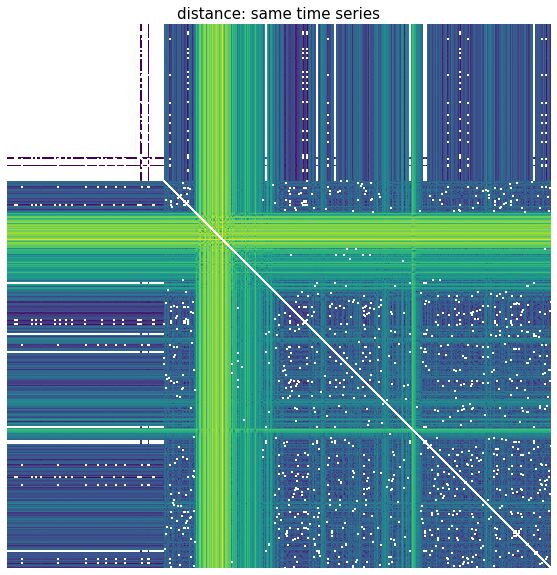

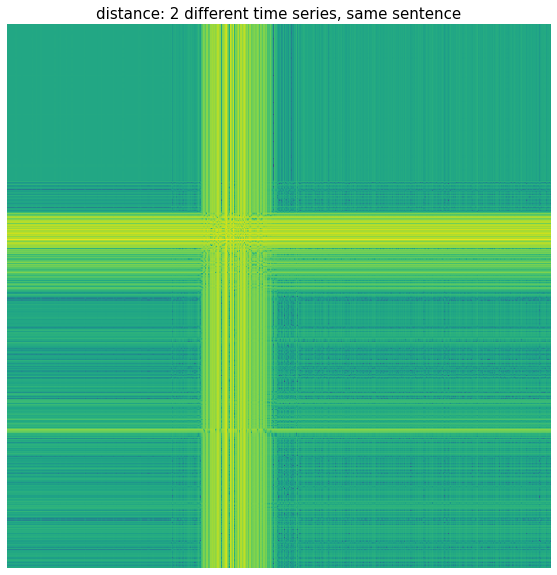

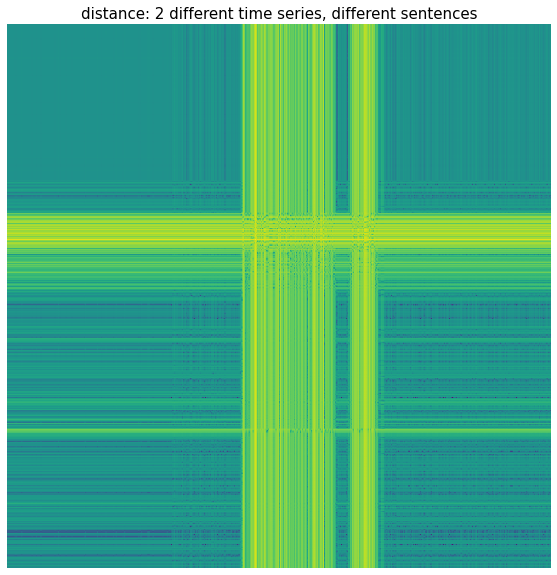

In [25]:
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[1][::steps]).T,
      metric=l1)))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[2][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[10][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, different sentences", 
         fontsize=15);
pl.axis('off');


Fig : Same information as above can be seen here. All graphs are showing distance metric for different variation in data and therefore exhibiting different characteristics. First one being the same dataset shows a single shaded vertical region and for second graph with same sentence but different data, shows slightly wider but single vertical line. The third plot shows multiple vertical shaded lines since the data are different and correspond to different sentences

## Computing the distance between all pixel pairs is also prohibitively slow. Do doit I further resampled the array by another factor of 10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


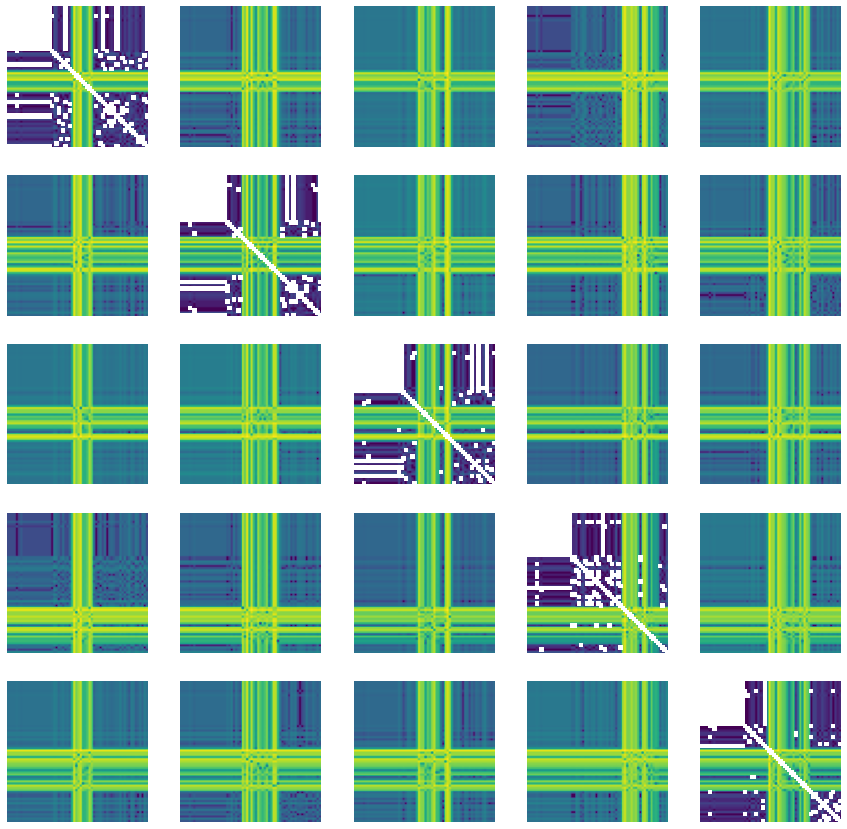

In [28]:
restep = 100
fig = pl.figure(figsize(15, 15))

for i in range(0,25,5):
    for k, j in enumerate(range(0,25,5)):
        ax = fig.add_subplot(5,5,i + k + 1)
        pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T, 
                np.atleast_2d(X[j][::restep]).T, 
          metric=(lambda x,y: np.abs(x - y)))))
        pl.axis('off');

Figure 6: same as figure 5 for all pairs of sound bites

# DTW distance
The DTW algorithm calculates the distance as the sum along a path in the  pair-wise distance matrix that minimized the distance between points, at the cost of increasing the length of the path. The simple Euclidean distance between 2 matrices would be the sum along the diagonal. In DTW this sum is modified to be the sum over the elements as follows:


$DTW(Q_i, C_j) = d(Q_i, C_j) + min(d(Q_{i-1}, C_{j-1}), d(Q_{i-1}, C_j), d(Q_i, C_{j-1})) $
Where $d$ is the distance between 2 time stamps: e.g. the absolute value of thedifference (L1)

The algorithm has the following rules:

- Every index from the first sequence must be matched with one or more indices from the other sequence and vice versa
- The first index from the first sequence must be matched with the first index from the other sequence (but it does not have to be its only match)
- The last index from the first sequence must be matched with the last index from the other sequence (but it does not have to be its only match)
- The mapping of the indices from the first sequence to indices from the other sequence must be monotonically increasing, and vice versa, i.e. if j > i are indices from the first sequence, then there must not be two indices l > k in the other sequence, such that index i is matched with index l and index j is matched with index k , and vice versa

Remember that you will need to start with the L1 distance: at every step you will need to know the L1 distance for several surrounding cells. While you could calculate it on the spot it is more computationally efficient in python to calculate it for the whole array at once, as long as you can store the whole array in memory. Solving this with "dynamic coding", you can calculate all pair-wise distances first, storing the distance matrix, then find the path along the matrix and calculating the DTW distance by looking up values of the relevant cells. Pairwise L1 distance can be caluclated for the entire matrix with ```scipy.spatial.distance.cdist```

With that in mind, create a function that given x and y, two np.arrays of n and m elements respectively, returns 
 - the DTW distance
 - the DTW distance matrix 
 - the path along the matrix as x-y indices (look in the slides if you need help with this one: I added the code in there) 

Make sure your function called *dtw()* and make sure that it has a "docstring' that complies to PEP conventions https://www.python.org/dev/peps/pep-0257/



Run your function for the soundbite arrays using every 100th datapoint and plot the array and the path along the array
 - for the first normalized sound array matched with itself
 - for the first normalized sound array matched with another normalized sound array of the same phrase:  soundbites are the same sentence 5 by 5: 0-4 same sentence, 5-9, 10-14, 15-19, 19-20
 - for the first unnormalized sound array matched with another unnormalized sound array, the same one as in the previous step
 - any two other normalized arrays, not the same sentence. 
 
What is the path for the first array you plotted? Why?

## *task 3: write on your own the DTW algorithm. Use the rules above and the pseudocode and equations in the slides* 

## *Extra Credit: code the DTW with a parameter r tha allows to search farther than one step away from the diagonal. Make that r an input to your dtw() function*

In [0]:

def path(DTWm):
  # the path can be calculated backword or forward
  # I find bacward more intuitive
  # start at one to the last cell:
  i, j = np.array(DTWm.shape) - 2
  print('i, j are', i, j)
  #since I do not know how long the path is i will use lists
  # p and q will be the list of indices of the path element along the 2 array axes
  p, q = [i], [j]
  # go all the way to cell 0,0
  while (i > 0) or (j > 0):
      	# pick minimum of 3 surrounding elements: 
      	# the diagonal and the 2 surrounding it
        tb = argmin((DTWm[i, j], DTWm[i, j+1], DTWm[i+1, j]))
        #stay on the diagonal
        if tb == 0:
            i -= 1
            j -= 1
        #off diagonal choices: move only up or sideways
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        # put i and the j indexx into p and q pushing existing entries forward
        p.insert(0, i)
        q.insert(0, j)
  # print('p, q are :', p)
  # print('p, q are :', q)

  return  array(p), array(q)



In [175]:
min(1,2,3)

1

## code steps:
- Calculate the distance matrix according to L1
- Set the 0,0 cell to 0
- for all values of the index i; for all values of the index j

  set the DTW[i,j] cell to $L1 + min(l1(Q_{i-1}, C_{j-1}), L1(Q_{i-1}, C_j), L1(Q_i, C_{j-1}))$

- calculate the DTW path
- return the value of the last cell (DTW[-1,-1])  the DTW array, the path

note: you will likely have to have a nested loop but there are extra points if yuo can figure out how to write it without a nested loop (for i...: for j....:)

In [271]:
"""
(np.atleast_2d(X[1][::steps]).T).shape
X[0][::10].shape
restep = 10
l1(X[0][::restep], X[0][::restep])
print(np.array(X[0][::restep]).shape)
XX_row = np.array([X[0][::restep]]);
print(XX_row.shape)
XX_col = XX_row.T
print(XX_col.shape)
res = XX_col.dot(XX_row)
print(res.shape)

# Find path
[p, q ]= path(res)
print(type(p), type(q))
"""


'\n(np.atleast_2d(X[1][::steps]).T).shape\nX[0][::10].shape\nrestep = 10\nl1(X[0][::restep], X[0][::restep])\nprint(np.array(X[0][::restep]).shape)\nXX_row = np.array([X[0][::restep]]);\nprint(XX_row.shape)\nXX_col = XX_row.T\nprint(XX_col.shape)\nres = XX_col.dot(XX_row)\nprint(res.shape)\n\n# Find path\n[p, q ]= path(res)\nprint(type(p), type(q))\n'

In [0]:
# print(p, q)

In [0]:
# Examples of matrix multiplication
"""
a = np.array([[1],[2],[3],[4]])
b = np.array([[1,1,1,1,1],])

ab = np.matmul(a, b)
# print (ab)
# print(ab.shape)
b.shape
row_vector = np.array([[1, 3, 2]])
col_vec = row_vector.T
print(row_vector)
print(col_vec)
col_vec.dot(row_vector)
"""


'\na = np.array([[1],[2],[3],[4]])\nb = np.array([[1,1,1,1,1],])\n\nab = np.matmul(a, b)\n# print (ab)\n# print(ab.shape)\nb.shape\nrow_vector = np.array([[1, 3, 2]])\ncol_vec = row_vector.T\nprint(row_vector)\nprint(col_vec)\ncol_vec.dot(row_vector)\n'

In [31]:
"""
cdist(np.array([X[0][::restep]]), np.array([X[0][::restep]]), 
                        metric= l1 )
"""

# XX = np.array([X[0][::int(restep/10)]]);

# print('shape of x is : ', XX.shape)
"""
XX[0] - XX[0][0]
# Compute the distance matrix using l1
test1 = l1(XX[0][40], XX[0][0])
print(test1)
test2 = l1_v2(XX[0] , XX[0][0])
print(type(test2[40]))
np.shape(XX)

print(np.empty([2, 3], dtype=float64).shape)
dim = XX.shape[1]
dim

XX2 = np.empty([2, 5], dtype=float64)
print(XX2)
print('Notjing')
print(XX.shape)
"""

shape of x is :  (1, 640)


"\nXX[0] - XX[0][0]\n# Compute the distance matrix using l1\ntest1 = l1(XX[0][40], XX[0][0])\nprint(test1)\ntest2 = l1_v2(XX[0] , XX[0][0])\nprint(type(test2[40]))\nnp.shape(XX)\n\nprint(np.empty([2, 3], dtype=float64).shape)\ndim = XX.shape[1]\ndim\n\nXX2 = np.empty([2, 5], dtype=float64)\nprint(XX2)\nprint('Notjing')\nprint(XX.shape)\n"

In [0]:
def l1_v2(a, b):
    """
    returns absolute distance using l1
    Input : 
       a : 1D array
       b : 1D array
    """
    return (np.abs(a - b))


In [31]:
# Calculate distancance matrix
def get_dist_l1(X1, Y1):
  """
  returns distance matrix using l1 metric 
  Input :
    X1 : 1D numpy array 
    Y1 : 1D numpy array
    X1, Y1 are column vectors 
  """

  dim = X1.shape[0]
  distan = np.zeros([dim, dim], dtype=float64)*np.nan
  # print('shape of distance vector is : ', dim, distan[:,0].shape, (l1_v2(X1, Y1[0]))[:,0].shape)
  # print('checking is any inf', np.isposinf(distan).any())
  
  for ii in range(dim):
    distan[:, ii] = l1_v2(X1 , Y1[ii])[:,0]
  
  return distan
"""
distan0 = get_dist_l1(XX, XX)
print(distan0[:, 0].shape[0])
# Check if the diagonal elements of distan matrix are zeros
# by summing over all diagonal elements
np.sum(np.diag(distan0))
"""

'\ndistan0 = get_dist_l1(XX, XX)\nprint(distan0[:, 0].shape[0])\n# Check if the diagonal elements of distan matrix are zeros\n# by summing over all diagonal elements\nnp.sum(np.diag(distan0))\n'

In [65]:
XX.shape


(640, 1)

In [42]:
print(XX.shape[1])
print(X[0][::restep].shape[0])


640
64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


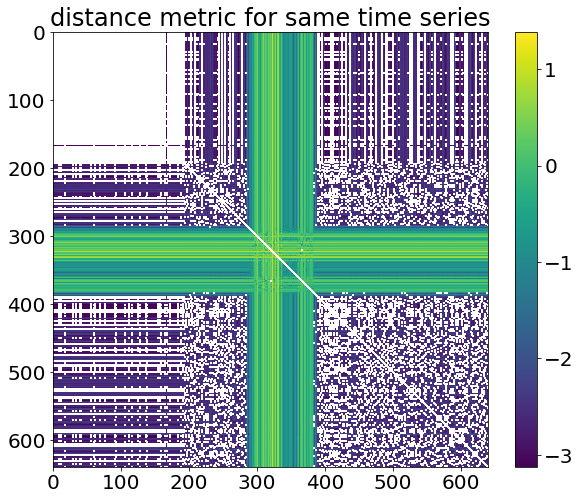

(640,)


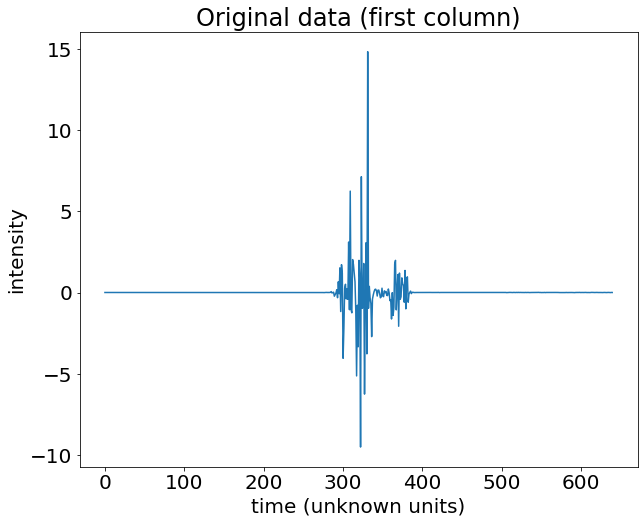

In [39]:
def dtw(x1, y1, show = False) :
  """
  Compute dtw matrix given data
  Input :
    x1 , y1 are column vectors (numpy array)
  """
  # Since there could be index 0 and dtw matrix includes terms like Q_{i-1, j} 
  # etc
  # dim1 = x1.shape[0]
  dim1 = len(x1)
  dim2 = len(y1)
  # print('dim1 is', dim1, x1.shape)
  
  dtw_matrix = np.zeros([dim1 + 1, dim2 + 1], dtype=float64) 
  for ii in range(dim1+1):
    for jj in range(dim2+1):
      dtw_matrix[ii,jj] = np.inf
  # dist_l1 = get_dist_l1(x1, y1)
  # print('distance is: ', np.sum(np.diag(dist_l1)))
  
  # Get the path from distance matrix
  # p, q = path(dist_l1)
  dtw_matrix[0, 0] = 0
  for ii in range(1, dim1 + 1 ):
    for jj in range(1, dim2 + 1 ):
      #if ii > 0 and jj > 0:
        dtw_matrix[ii , jj ] = l1(x1[ii - 1], y1[jj - 1]) + np.min(
            [dtw_matrix[ii, jj-1], dtw_matrix[ii-1, jj], dtw_matrix[ii-1, jj-1] ])
  """
  sums = 0
  for ii in p:
    for jj in q:
      # if ii > 0 and jj > 0 :
        dtw_matrix[ii  , jj ] = dist_l1[ii, jj] + min(dist_l1[ii - 1, jj - 1],  
                                               dist_l1[ii, jj - 1], 
                                               dist_l1[ii - 1, jj])
        sums = sums + dist_l1[ii, jj] #+ dtw_matrix[ii , jj ] 
  """
  """
        if dtw_matrix[ii, jj] > 0 :
           print('dtw elements are :', ii, jj, dtw_matrix[ii , jj ])
  """


  # print('dtw distance is', dtw_matrix[-1, -1] )
  

  

  return dtw_matrix[-1, -1]
  
"""
XX = np.array([X[0][::int(restep/10)]]).T;

(dtw(XX, XX, show=True))
# dtw(XX, XX, show=True)
# print(type(X[0][::restep]))

# print('testing dtw matrix', test_dtw)

# DTW distance to itself
# print("dtw distance: ", dtw(X[0][::restep], X[0][::restep], show=True));
pl.figure(figsize(10,3))
pl.plot(X[0][::int(restep/10)] );
"""
# DTW distance to itslef
#print("dtw distance: ", dtw(X[0][::restep], X[0][::restep], show=True)[0]);
# restep = int(restep/10)
pl.figure(figsize(10,8))
restep = 10
pl.imshow(np.log10(cdist(np.atleast_2d(X[0][::restep]).T, 
                np.atleast_2d(X[0][::restep]).T, metric=dtw)))
pl.title('distance metric for same time series')
pl.colorbar()
pl.show()
pl.plot(X[0][::restep])
pl.title('Original data (first column)')
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);
print(X[0][::restep].shape)



Fig : The top figure shows distance metric computed using dtw (dynamical time warping) method. One may note that diagonal elements are zero as it should be. The bottom panel shows the plot for original time series data for which the distance metric has been calculated. 

In [212]:
# Example
p = [1,2,3]
q = [2,2,2,3,4]
dtw(p,q)

dtw distance is 2.0


dtw distance:  121.55413980041301


No handles with labels found to put in legend.


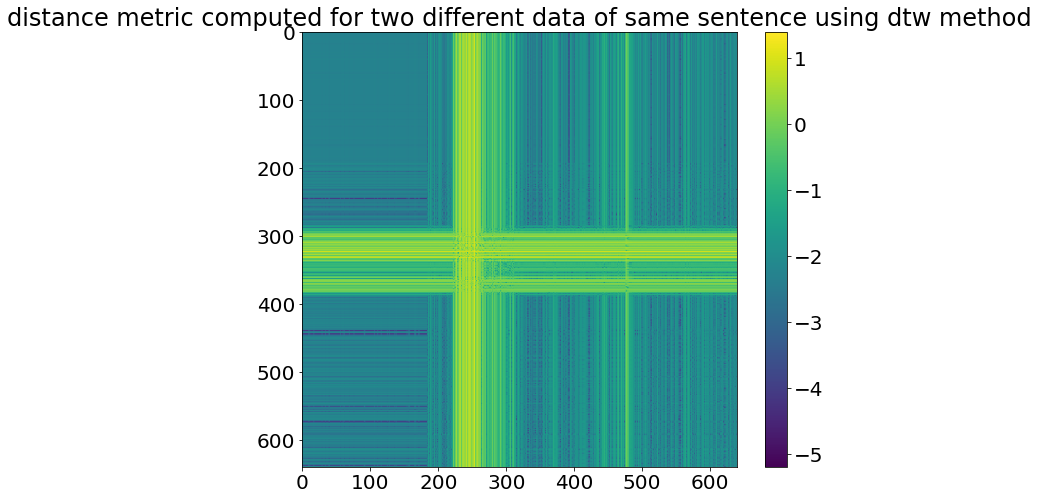

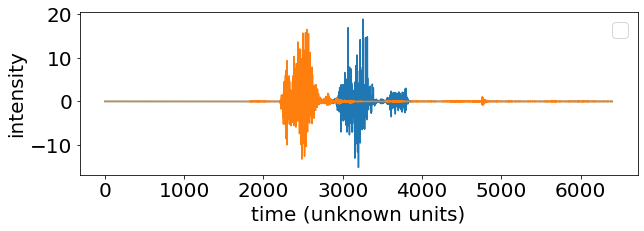

In [41]:
# DTW distance to a file with a different sound bite, normalized
# print("dtw distance: ", dtw(np.array([X[0][::int(restep/10)]]).T, np.array([X[1][::int(restep/10)]]).T, show=True))
print("dtw distance: ", dtw(X[0][::restep], X[1][::restep]))

pl.figure(figsize(10,8))

pl.imshow(np.log10(cdist(np.atleast_2d(X[0][::restep]).T, 
                np.atleast_2d(X[1][::restep]).T, metric=dtw)))
pl.title('distance metric computed for two different data of same sentence using dtw method')
pl.colorbar()
pl.figure(figsize(10,3))
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);
pl.plot(np.array([X[0][::int(restep/10)]]).T  )
pl.plot(np.array([X[1][::int(restep/10)]]).T);
pl.legend()

Fig : The top figure shows the distance metric calculated using dtw method for two different time series of same data. The colored distance metric shows mainly one shaded yellow line identifying similarity between two data set but also has spread since the are two different time series. The bottom panel are the two data set on which dtw has been performed. The data has been downsided by 10.

In [228]:
step
restep

10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in short_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
No handles with labels found to put in legend.


dtw distance:  13.367738084679551


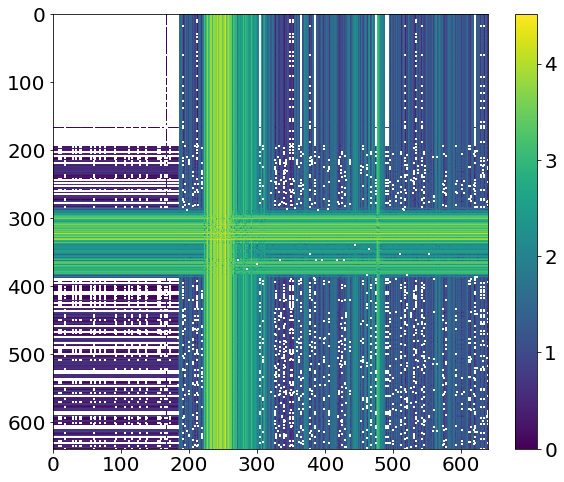

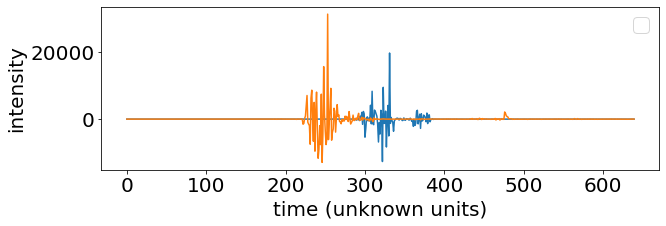

In [42]:
# DTW distance to a file with a different sound bite, normalized
step = 10
restep = 10
pl.figure(figsize(10,8))

pl.imshow(np.log10(cdist(np.atleast_2d(wavfiles[0][::step*restep]).T, 
                np.atleast_2d(wavfiles[1][::step*restep]).T, metric=dtw)))
pl.colorbar()
#print("dtw distance: ", dtw(np.array([wavfiles[0][::step*restep]]).T, 
#                          np.array([wavfiles[1][::step*restep]]).T, show=True))
print("dtw distance: ", dtw(X[0][::step*restep], X[1][::step*restep]))



pl.figure(figsize(10,3))
pl.plot(np.array([wavfiles[0][::step*restep]]).T)
pl.plot(np.array([wavfiles[1][::step*restep]]).T);
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);
pl.legend()


Fig : The figures above show result same as previous fig but data being downsided 10 times more reducing quality as one can see zeros in distance metric plot above.

dtw distance:  150.50888976161608
dtw distance:  150.50888976161608


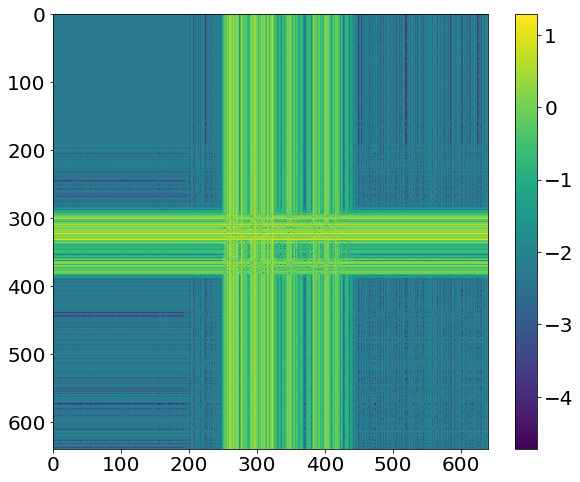

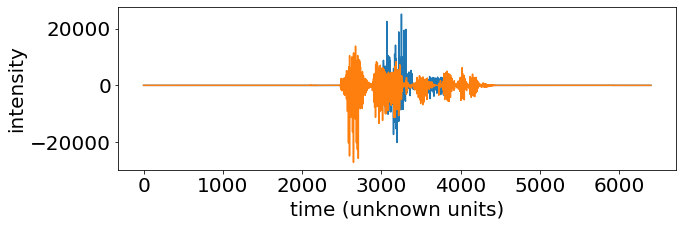

In [44]:
# DTW distance to a file with a different sound bite

"""
print("dtw distance: ", dtw(([X[0][::restep]]).T, 
                            np.array([X[24][::restep]]).T, show=True))
"""
pl.figure(figsize(10,8))
step = 1

pl.imshow(np.log10(cdist(np.atleast_2d(X[0][::step*restep]).T, 
                np.atleast_2d(X[24][::step*restep]).T, metric=dtw)))
pl.colorbar()

#print("dtw distance: ", dtw(np.array([wavfiles[0][::step*restep]]).T, 
#                          np.array([wavfiles[1][::step*restep]]).T, show=True))
print("dtw distance: ", dtw(X[0][::step*restep], X[24][::step*restep]))


#print("dtw distance: ", dtw(X[0][::restep], X[24][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::step*restep])
pl.plot(wavfiles[24][::step*restep])
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);
print("dtw distance: ", dtw(X[0][::step*restep], X[24][::step*restep]))


Fig : The figure above shows distance metric for two different time series for two different sentences and the distance metric clearly identifies the difference showing nonzero numbers which can be seen as broadened yellow shaded area in top graph. The data has been downsited and can be downsided further by controlling "step" parameter. The bottom panel shows the original two time series.

# 2 What is the nearest neighbor of the first sound bite?

In [233]:
# what is most similar to the first time series? (other than itself)
distances = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    # distances[i], _, _ = dtw(X[0][::restep], X[i][::restep]);
    # Increasing data inverval by step else it will run really slow
    distances[i] = dtw(X[0][::step*restep], X[i][::step*restep]);




0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [234]:

distances.argsort()

array([ 0,  6, 24, 13, 15,  8,  3,  2,  1, 18,  7,  5,  4, 14,  9, 22, 17,
       16, 10, 11, 19, 21, 20, 12, 23])

In [235]:
print("Based on its nearest neighbor the first sound bite says...")
print(y[distances.argsort()[1]])

Based on its nearest neighbor the first sound bite says...
Tofftl





















## *task 4: Classify the 20th sound bite based on its nearest neighor with Euclidean and DTW distance*

In [236]:
# what is most similar to the first time series? (other than itself)
distancesE = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesE[i] = euclidean(X[19], X[i]);



0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [237]:
distancesE.argsort()

array([19,  0, 11, 18,  8, 12,  6, 16,  2, 14, 22,  3, 17, 21,  1,  4, 13,
        9, 10, 15,  5, 23, 24, 20,  7])

In [238]:
print("Based on its nearest neighbor and Euclidian distance ",
      "the last sound bite says...")
print(" ")
print("Correct!") if y[distancesE.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and Euclidian distance  the last sound bite says...
 
Sorry...


In [241]:
# what is most similar to the first time series? (other than itself)
distancesDTW = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesDTW[i] = dtw(X[19][::steps*restep], X[i][::steps*restep]);


0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [242]:
print("Based on its nearest neighbor and DTW distance ",
      "the last sound bite says...")
print(y[distancesDTW.argsort()[1]])
print("Correct!") if y[distancesDTW.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and DTW distance  the last sound bite says...
Jarvis
Sorry...
